# TASK-2: Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
X=data.iloc[:,:1]
Y=data.iloc[:,1]


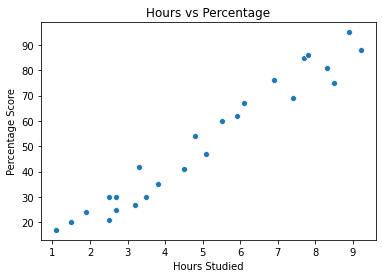

In [4]:
sns.scatterplot(x="Hours",y="Scores",data=data)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()



In [5]:
model1=linear_model.LinearRegression()
model1=model1.fit(X,Y)

In [6]:
Y_pred=model1.predict([[9.25]])

In [7]:
Y_pred

array([92.90985477])

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=0)

In [9]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(22, 1) (3, 1) (22,) (3,)


In [10]:
model2=linear_model.LinearRegression()
model2=model2.fit(X_train,Y_train)

In [11]:
Y_predict=model2.predict(X_test)

In [12]:
from sklearn.metrics import mean_absolute_error
abs=mean_absolute_error(Y_test,Y_predict)
abs


5.3994503136120064

In [13]:
model3=tree.DecisionTreeRegressor()
model3=model3.fit(X,Y)

In [14]:
Y_own=model3.predict([[9.25]])
Y_own

array([88.])

In [15]:
model4=tree.DecisionTreeRegressor(random_state=11)
model4=model4.fit(X_train,Y_train)

In [16]:
Y_own1=model4.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error
abs1=mean_absolute_error(Y_test,Y_own1)
abs1


11.333333333333334

# TASK-3:
This notebook will walk through some of the basics of K-Means Clustering,Meah Shift and DBSCAN 

In [18]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [82]:
data=load_iris()

In [69]:
X=pd.DataFrame(data.data,columns=load_iris.feature_names)
Y=pd.DataFrame(data.target)

AttributeError: 'function' object has no attribute 'feature_names'

In [21]:
X=X.iloc[:,[0,1,2,3]]
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
ideal_k=[]
for i in range(1,14):
    kmeans=KMeans(n_clusters=i, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state=0)
    kmeans.fit(X)
    ideal_k.append([i,kmeans.inertia_])

In [23]:
ideal_k=np.array(ideal_k)
ideal_k[:,0]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.])

<AxesSubplot:>

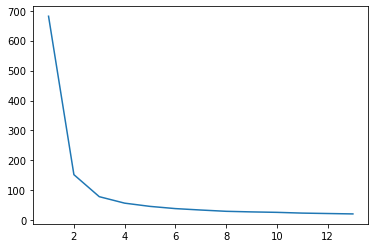

In [24]:
sns.lineplot(x=ideal_k[:,0],y=ideal_k[:,1])

In [25]:
kmeans2=KMeans(n_clusters=3, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state=0)
Y_predict=kmeans2.fit_predict(X)

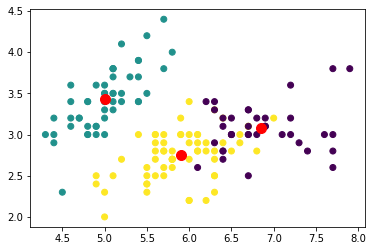

In [27]:
plt.scatter(x=X.iloc[:,0],y=X.iloc[:,1],c=Y_predict)
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

In [34]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
kmeans_score7 = silhouette_score(X, Y_predict, metric='euclidean')
kmeans_score8 = calinski_harabasz_score(X, Y_predict)
print(kmeans_score7,kmeans_score8)

0.5528190123564091 561.62775662962


In [66]:
from sklearn.cluster import MeanShift
estimated_4=MeanShift(bandwidth=0.6,cluster_all=True)
estimated_5=estimated_4.fit(X)
estimated_6=estimated_5.predict(X)
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
kmeans_score9 = silhouette_score(X, estimated_6, metric='euclidean')
kmeans_score10 = calinski_harabasz_score(X, estimated_6)
print(kmeans_score9,kmeans_score10)

0.2975645063485841 278.910795281504


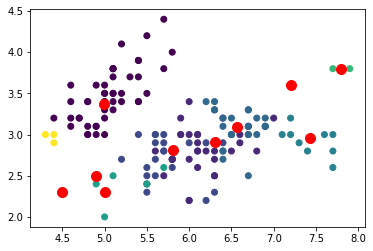

In [67]:
plt.scatter(x=X.iloc[:,0],y=X.iloc[:,1],c=estimated_6)
plt.scatter(estimated_5.cluster_centers_[:, 0], estimated_5.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

In [63]:
from sklearn.cluster import DBSCAN
estimated_21=DBSCAN(eps=0.6)
estimated_22=estimated_21.fit_predict(X)
#estimated_23=estimated_22.predict(X)

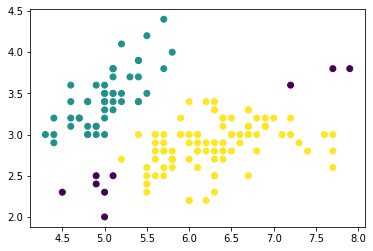

In [64]:
plt.scatter(x=X.iloc[:,0],y=X.iloc[:,1],c=estimated_22)


In [65]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
kmeans_score112 = silhouette_score(X, estimated_22, metric='euclidean')
kmeans_score111 = calinski_harabasz_score(X, estimated_22)
print(kmeans_score112,kmeans_score111)

0.5381725940321741 230.14862526195472


# TASK-4: Workshop - Decision Trees

In [71]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd

# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))

y=iris.target
print(y)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [72]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


# Let us visualize the Decision Tree to understand it better.

In [77]:
# Install required libraries
!pip install pydotplus
!pip install graphviz

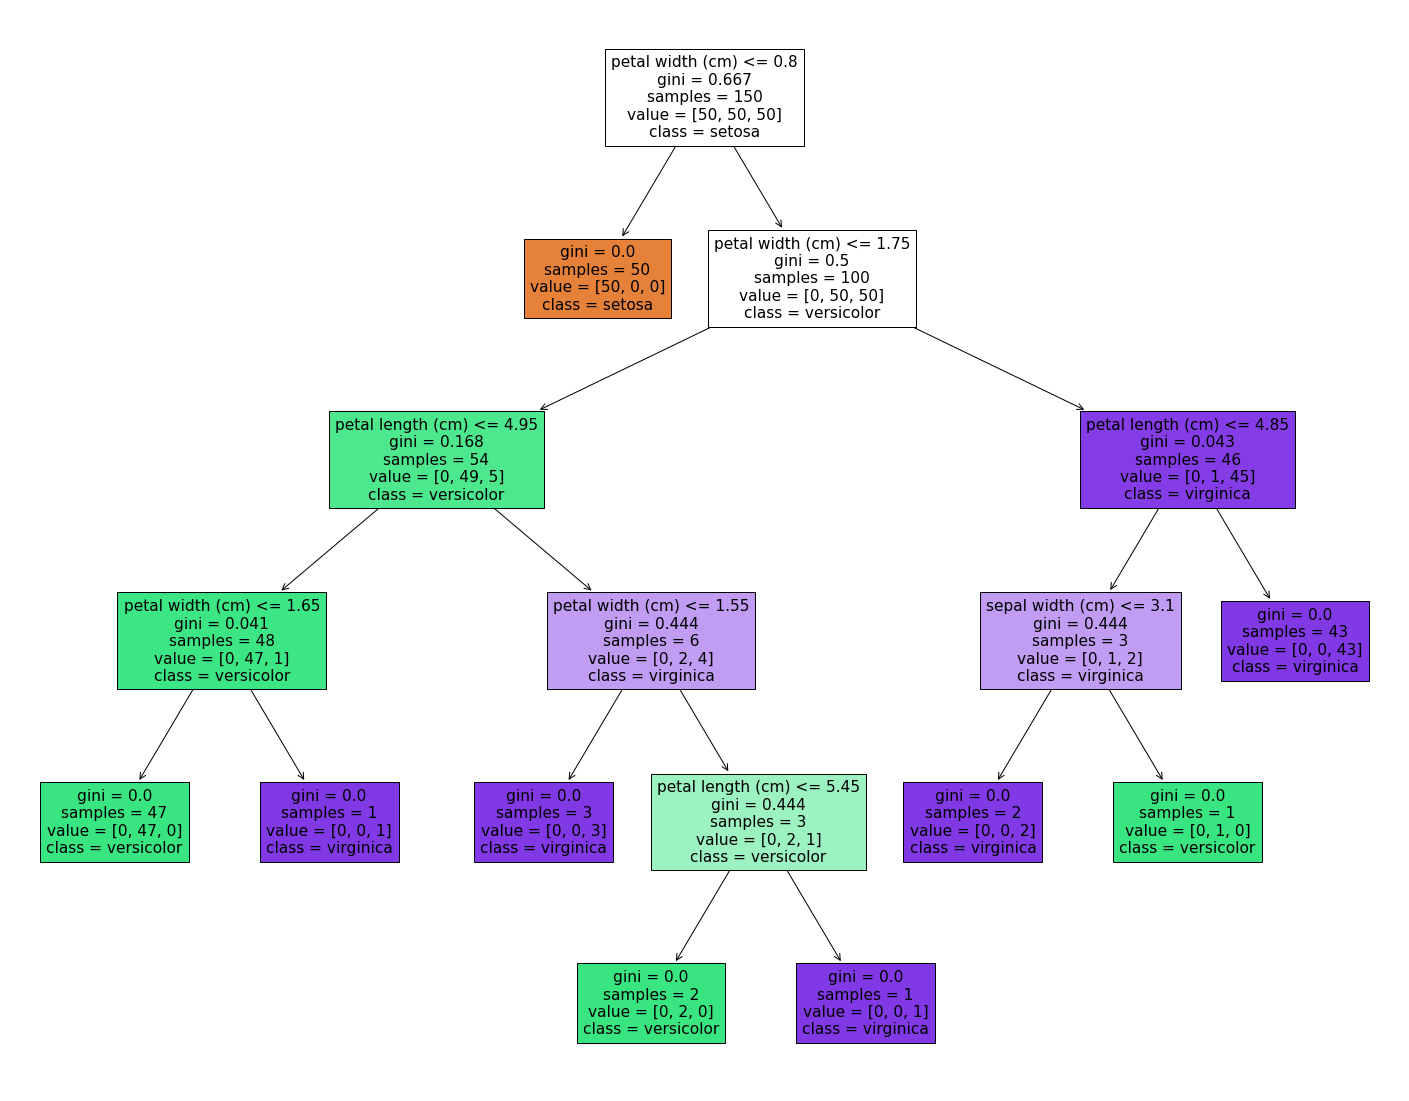

In [81]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

# TASK-5:Perform ‘Exploratory Data Analysis’ on the provided dataset.

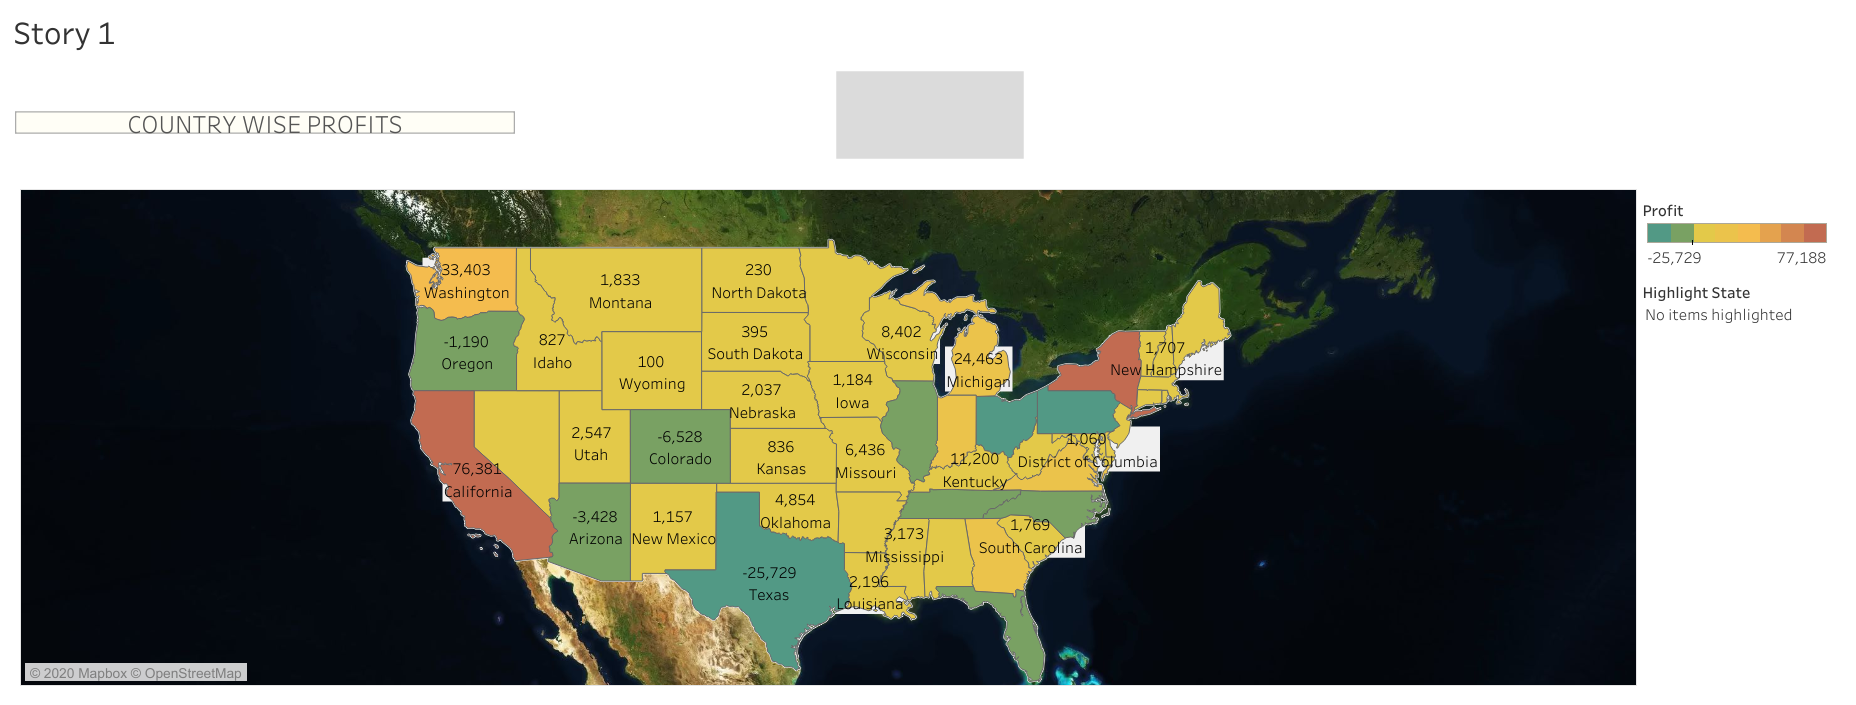